# Laboratory Assignment 1 (LAB1)
## Implementing Spiking Neurons using Izhikevich's Model

### Assignment 1: Implementation of the Izhikevich model

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.titlesize'] = 15 

### neuronplot(...)
Function that simulates the Izhikevich model and makes two plots (saving them in the 'plots' directory):
- membrane potential vs time + input current vs time
- phase portait i.e. recovery variable vs membrane potential

The function takes in input: 
- name of the feature 
- timestep duration (in ms)
- array of time instants 
- the 5 parameters of the Izhikevich model 
- the initial values of u and w 


In [3]:
def neuronplot(feature,dt,t,I,a,b,c,d,u0,w0):

    fig = plt.figure(figsize = (20, 10))
    ax0 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122) 

    fig.suptitle(feature, fontsize = 18)
    ax0.title.set_text('Membrane Potential Time Course')
    ax2.title.set_text('Phase Portrait')

    ax0.plot(t,I, color = 'r')
    ax0.set_xlabel('time [ms]')
    ax0.set_ylabel('Input Current [pA]', color = 'r')
    ax0.tick_params(axis = "y", labelcolor='r')
    u=np.zeros(len(t))
    w=np.zeros(len(t))

    #initial values
    u[0] = u0 
    w[0] = w0

    #numerical integration using leapfrog method
    #we have to distinguish the cases G, L, and R from the others because their equations are slightly different

    if feature == '(G) Class 1 excitable':
        for j in range (0,len(t)-1):
            u[j+1] = u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*u[j+1]-w[j])
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d

    elif feature == '(L) Integrator':
        for j in range (0,len(t)-1):

            u[j+1] = u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*u[j+1]-w[j])
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d
    elif feature == '(R) Accomodation':
        for j in range (0,len(t)-1):

            u[j+1] = u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*(u[j+1]+65))
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d
    else: 
        for j in range (0,len(t)-1):

            u[j+1] = u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
            w[j+1] = w[j]+dt*a*(b*u[j+1]-w[j])
            
            if u[j] > 30:
                u[j] = 30
                u[j+1] = c
                w[j+1] = w[j] + d

    ax1=ax0.twinx()
    ax1.plot(t,u, color = 'b')
    ax1.set_ylabel('Membrane Potential [mv]', color = 'b')
    ax1.tick_params(axis = "y", labelcolor = 'b')

    ax2.plot(u,w, color = 'b')
    ax2.set(xlabel = 'Membrane Potential [mV]', ylabel = 'Recovery Variable [a.u.]')

    plt.tight_layout()
    plt.savefig(f"plots/{feature}.pdf")
    plt.show()

# Implement the 20 neurocomputational features
The values of the Izhikevich’s model parameters and the shape of the input are taken from:
http://izhikevich.org/publications/figure1.m

# (A) Tonic Spiking


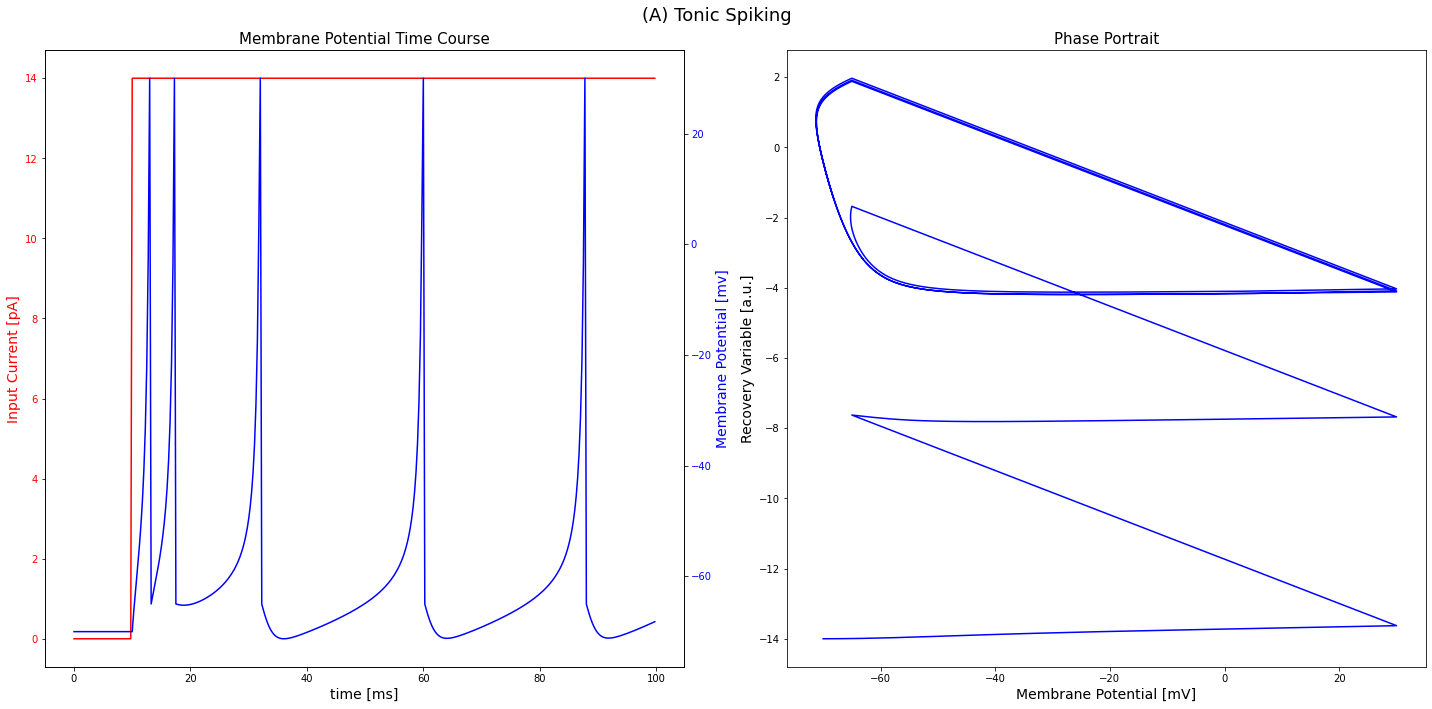

In [4]:
feature = '(A) Tonic Spiking'
dt = 0.25 #timestep [ms]
tmax = 100 #ms

#input current
t_input = int(tmax/10)
I_excitatory = 14
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.02
b = 0.2
c = -65
d = 6
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (B) Phasic Spiking

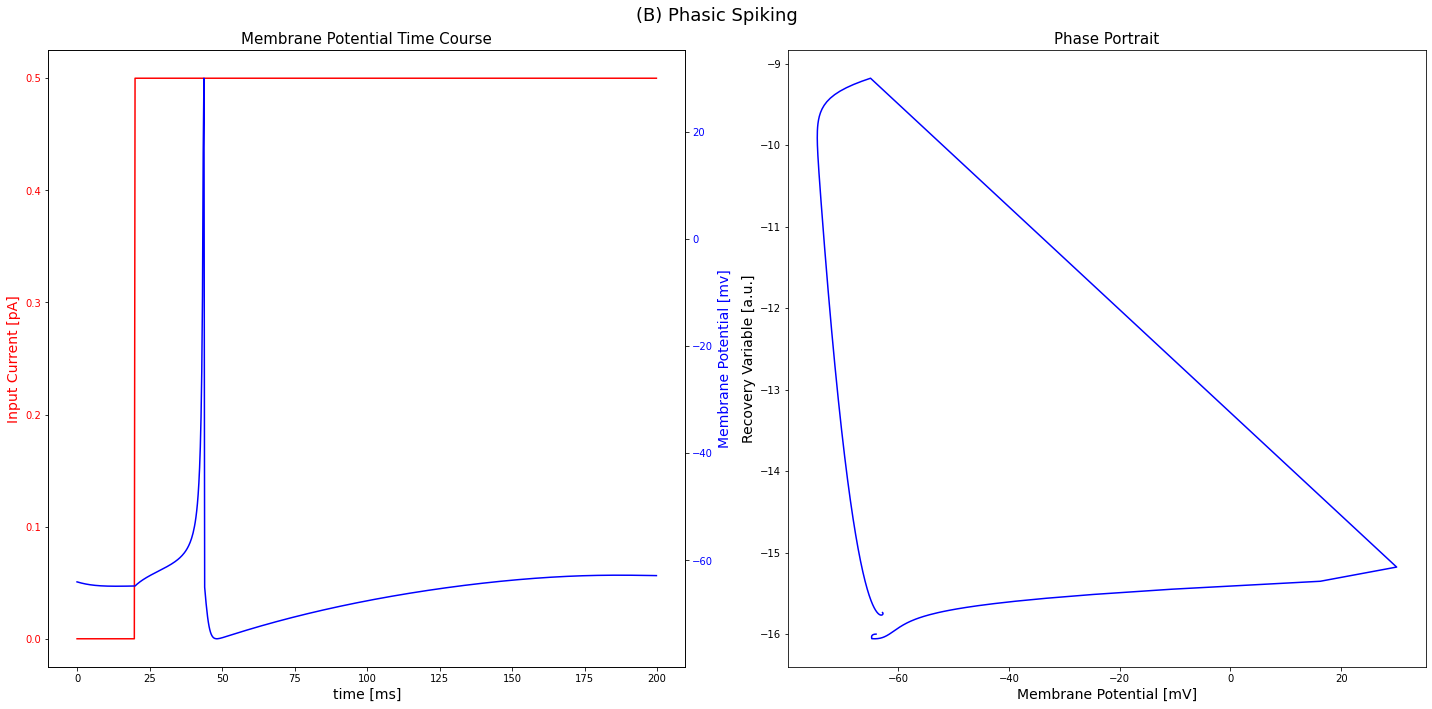

In [5]:
feature = '(B) Phasic Spiking'
dt = 0.25 #timestep [ms]
tmax = 200 #ms

#input current
t_input = 20
I_excitatory = 0.5
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.02
b = 0.25
c = -65
d = 6
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (C) Tonic Bursting

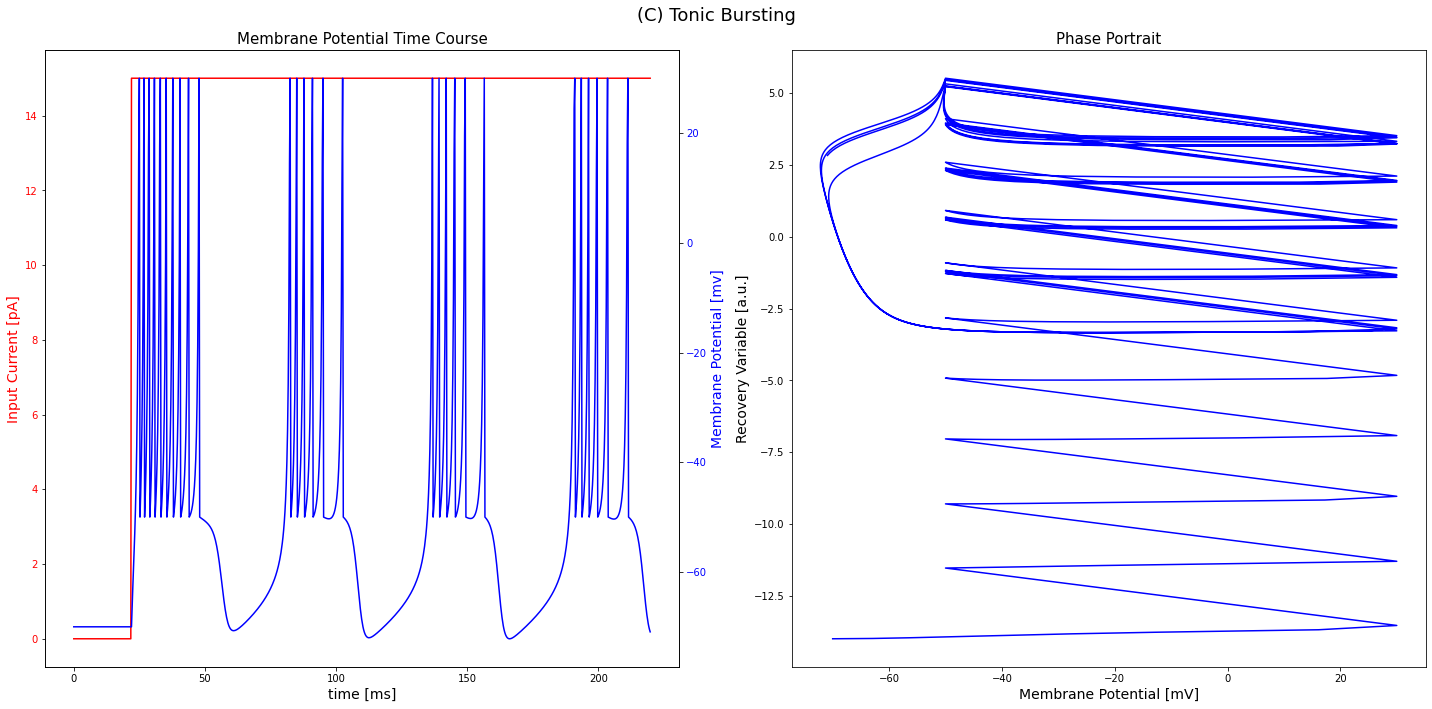

In [6]:
feature = '(C) Tonic Bursting'
dt = 0.25 #timestep [ms]
tmax = 220 #ms

#input current
t_input = 22
I_excitatory = 15
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.02
b = 0.2
c = -50
d = 2
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (D) Phasic Bursting

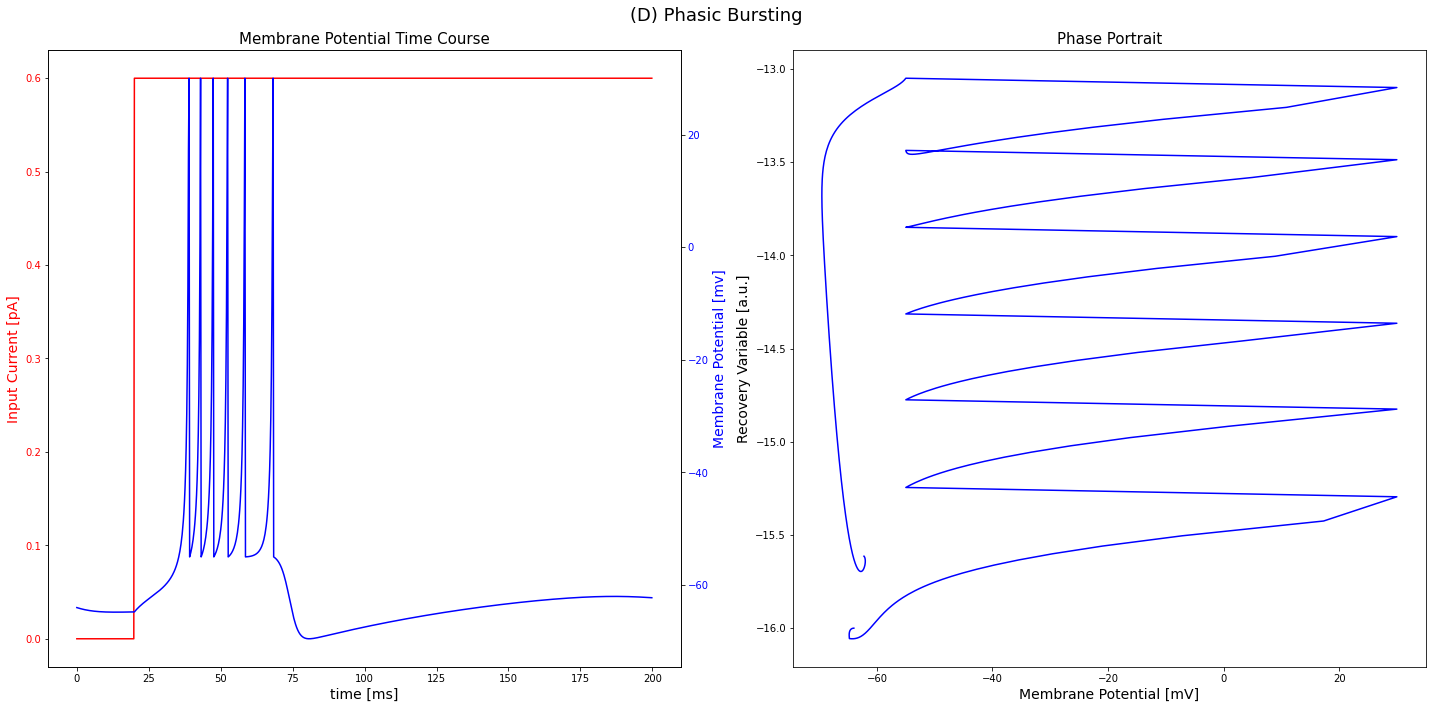

In [7]:
feature = '(D) Phasic Bursting'
dt = 0.2 #timestep [ms]
tmax = 200 #ms

#input current
t_input = 20
I_excitatory = 0.6
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.02
b = 0.25
c = -55
d = 0.05
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (E) Mixed Mode

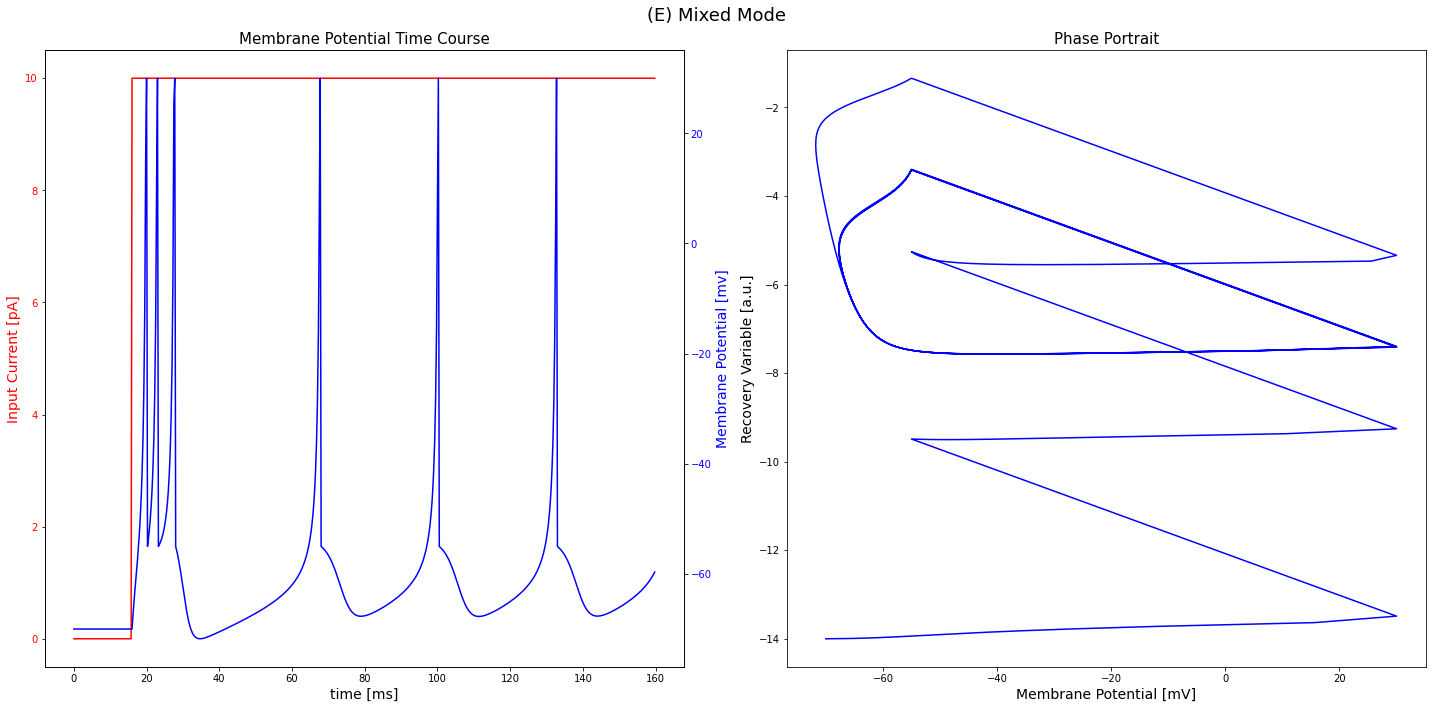

In [8]:
feature = '(E) Mixed Mode'
dt = 0.25 #timestep [ms]
tmax = 160 #ms

#input current
t_input = int(tmax/10)
I_excitatory = 10
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.02
b = 0.2
c = -55
d = 4
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (F) Spike Frequency Adaptation

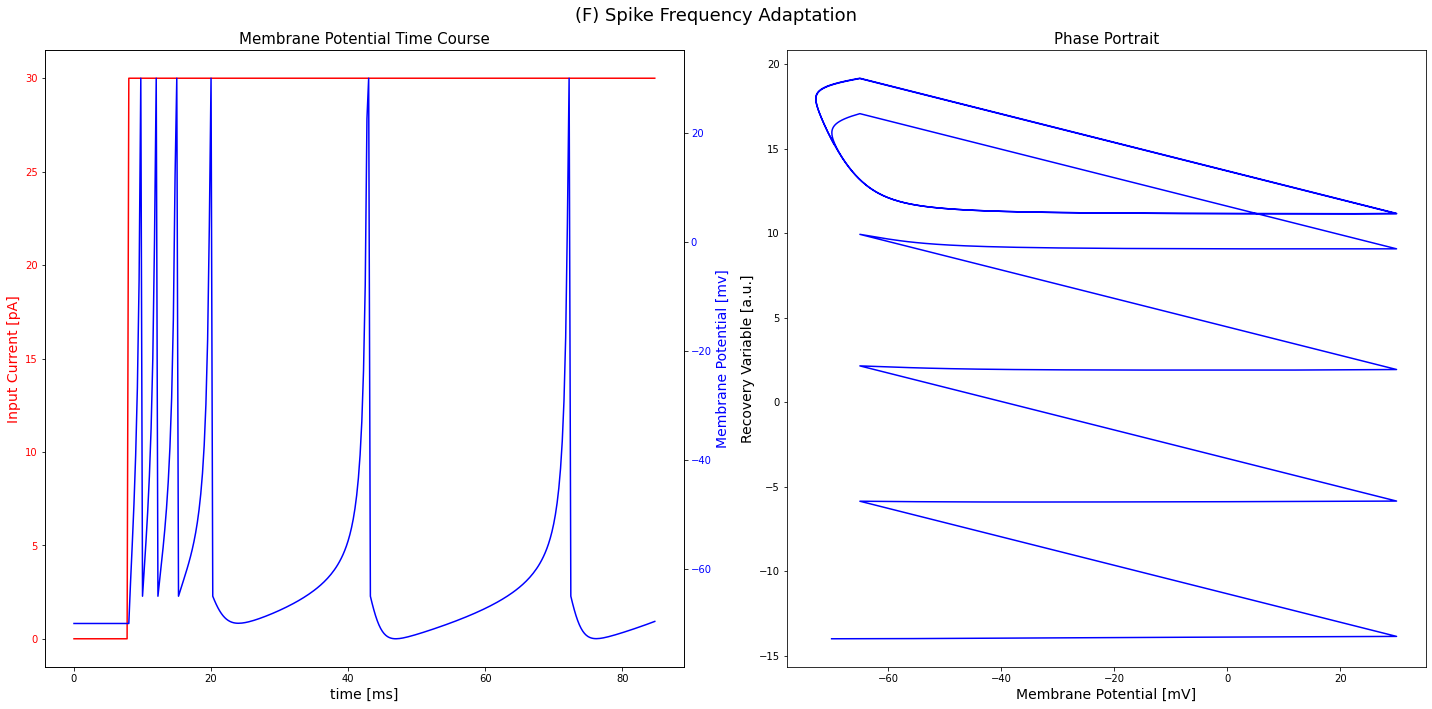

In [9]:
feature = '(F) Spike Frequency Adaptation'
dt = 0.25 #timestep [ms]
tmax = 85 #ms

#input current
t_input = int(tmax/10)
I_excitatory = 30
t = np.arange(0,tmax,dt)
I = np.zeros(len(t))
I[int(t_input/dt):] = I_excitatory

#initial conditions
a = 0.01
b = 0.2
c = -65
d = 8
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (G) Class 1 excitable

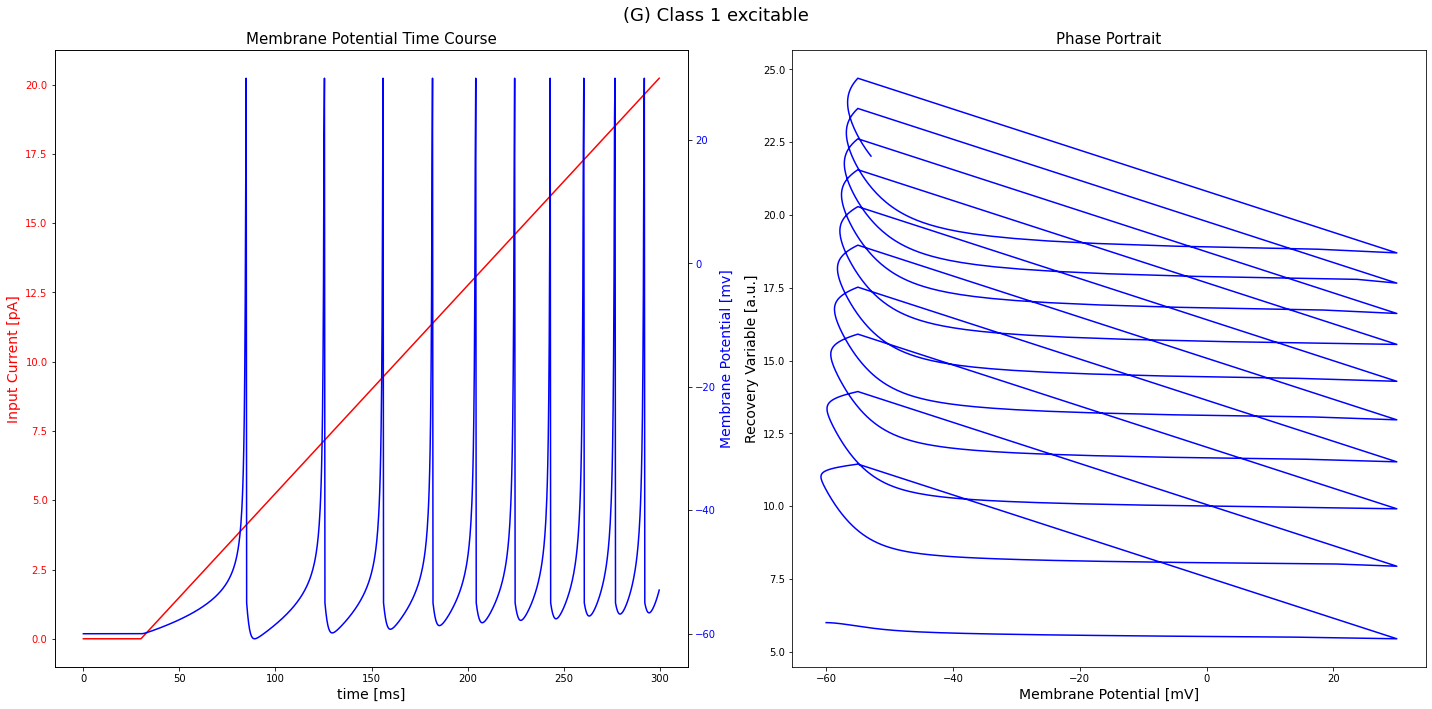

In [10]:
feature = '(G) Class 1 excitable'
dt = 0.25 #timestep [ms]
tmax = 300 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 30
I = np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = 0.075*(t[j]-t1)

#initial conditions
a = 0.02
b = -0.1
c = -55
d = 6
u0 = -60
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (H) Class 2 excitable

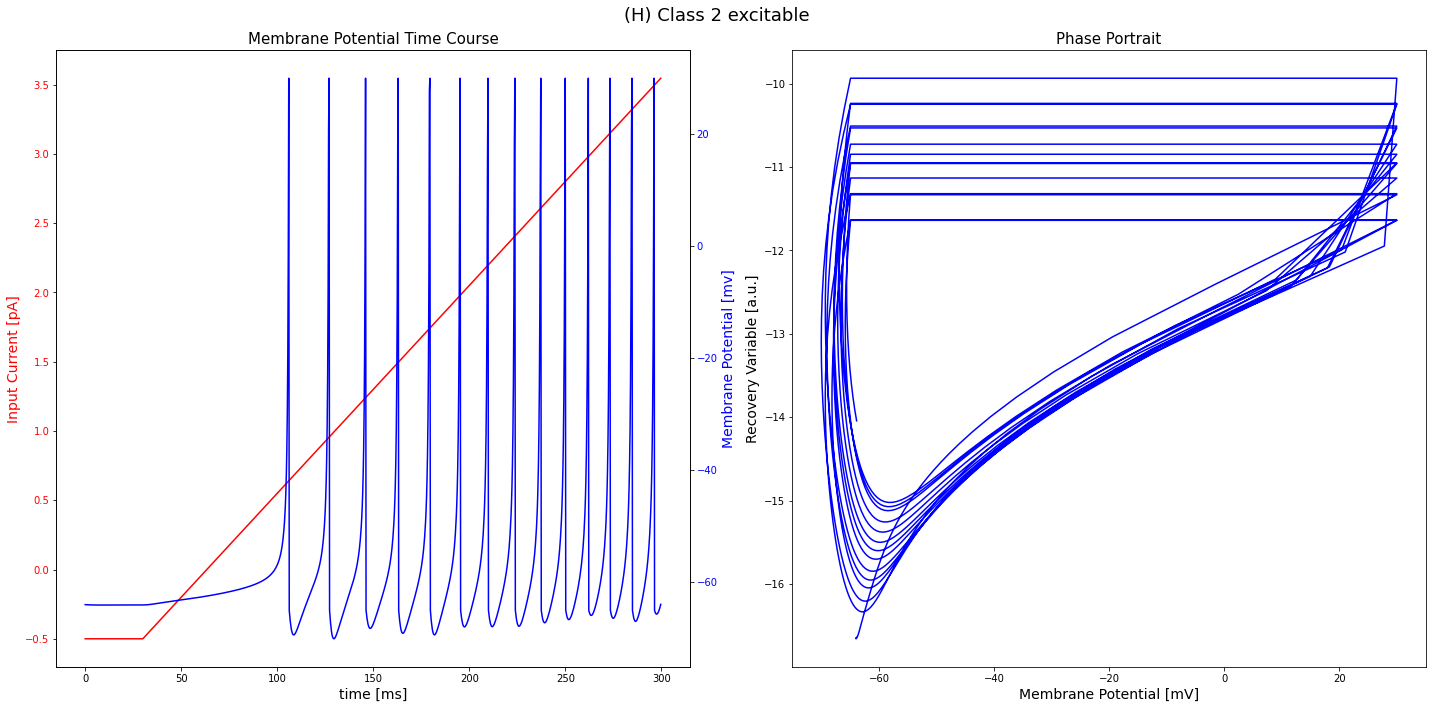

In [11]:
feature = '(H) Class 2 excitable'
dt = 0.25 #timestep [ms]
tmax = 300 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 30

I = np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = -0.5+(0.015*(t[j]-t1))
    else:
        I[j] = -0.5


#initial conditions
a = 0.2
b = 0.26
c = -65
d = 0
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (I) Spike Latency

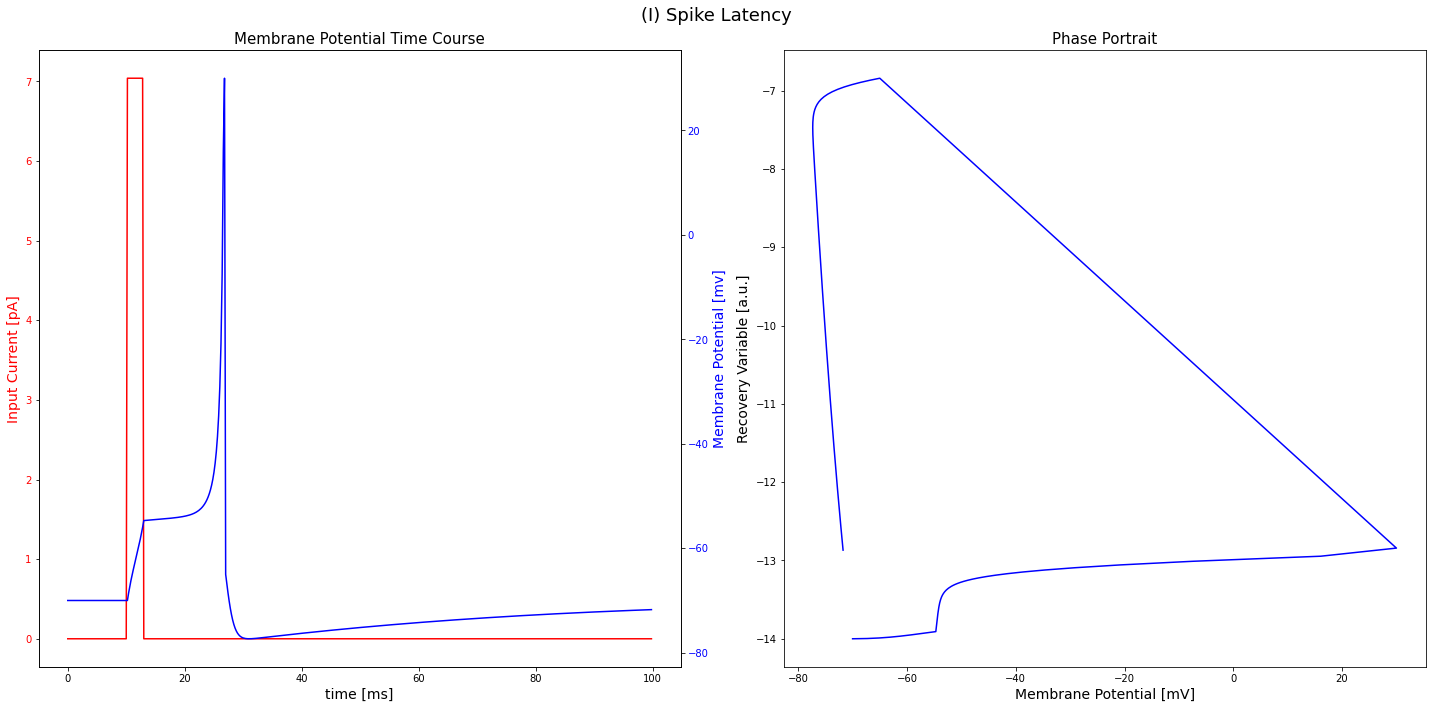

In [12]:
feature = '(I) Spike Latency'
dt = 0.2 #timestep [ms]
tmax = 100 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = int(tmax/10)
I = np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +3:
        I[j] = 7.04
        
#initial conditions
a = 0.02
b = 0.2
c = -65
d = 6
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (J) Subtreshold Oscillations

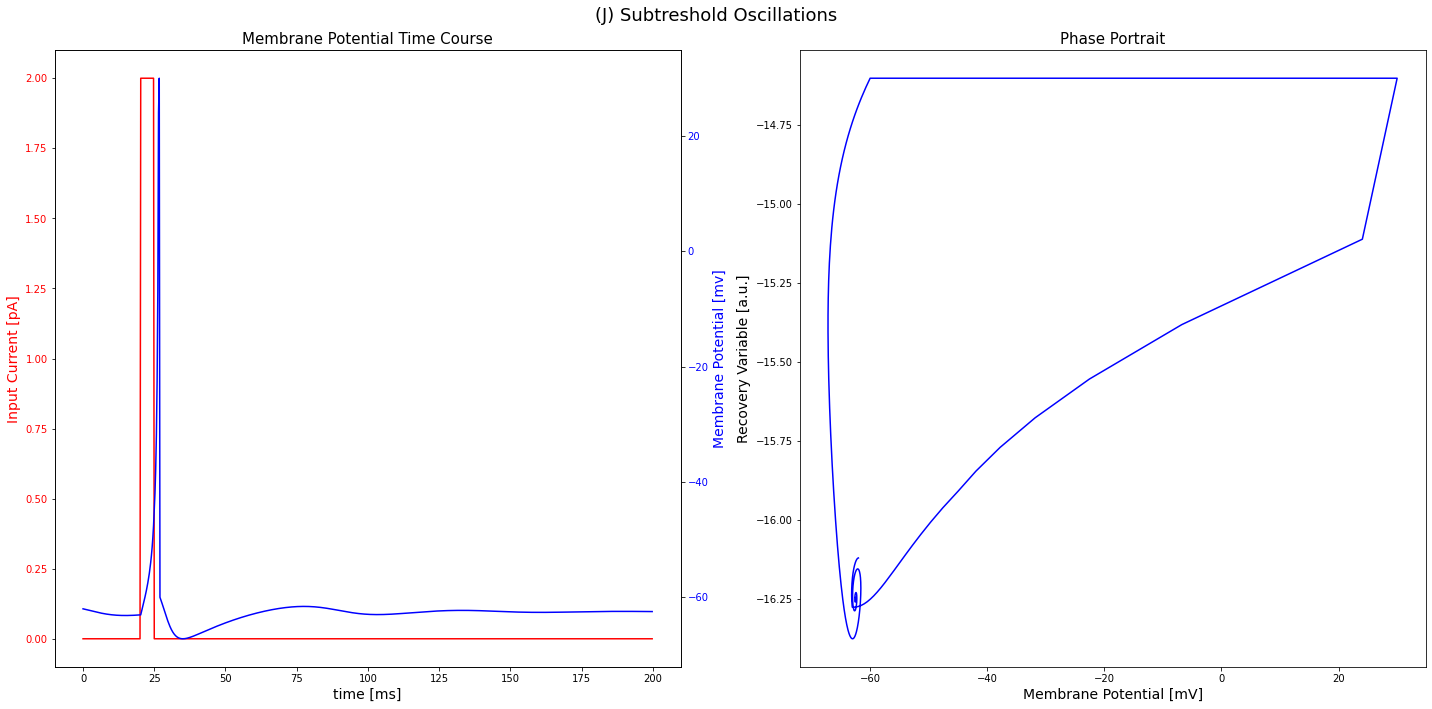

In [13]:
feature = '(J) Subtreshold Oscillations'
dt = 0.25 #timestep [ms]
tmax = 200 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = int(tmax/10)
I = np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +5:
        I[j] = 2
        
#initial conditions
a = 0.05
b = 0.26
c = -60
d = 0
u0 = -62
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (K) Resonator

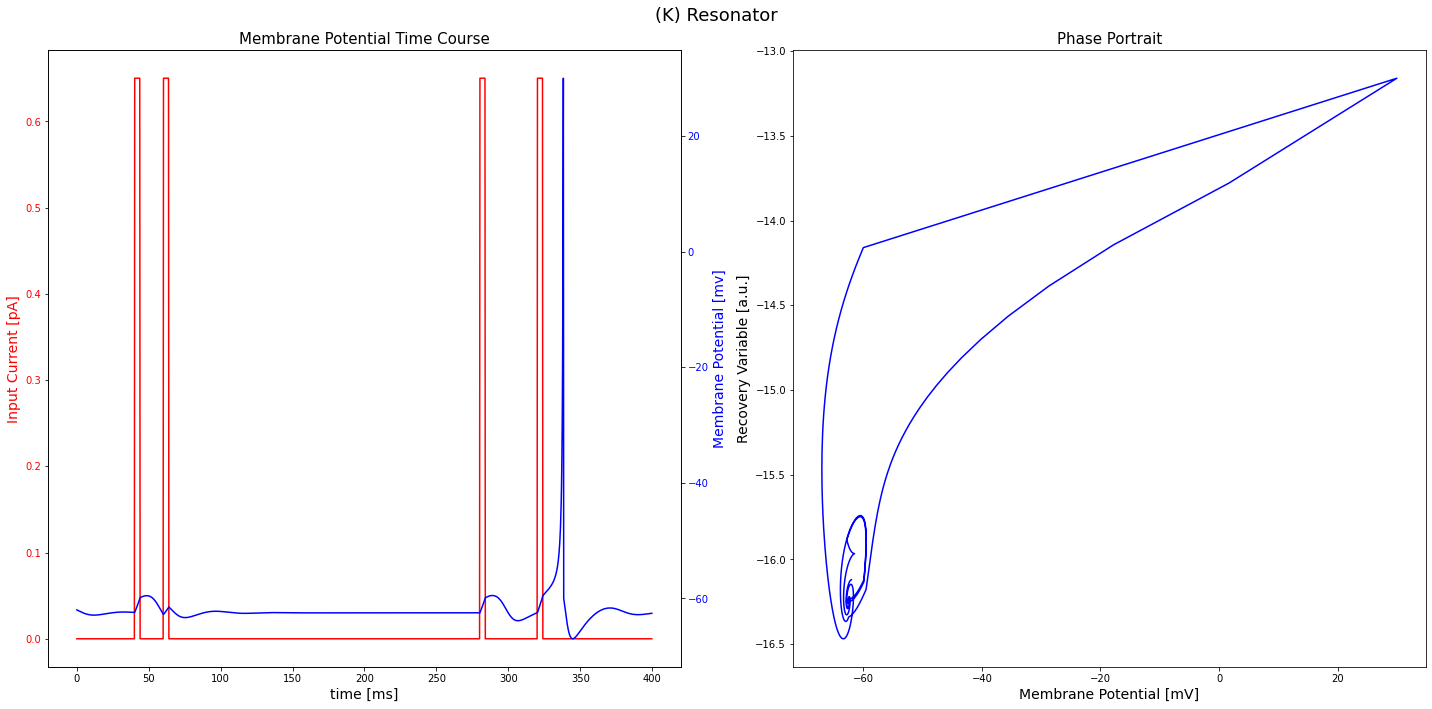

In [14]:
feature = '(K) Resonator'
dt = 0.25 #timestep [ms]
tmax = 400 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = int(tmax/10)
t2 = t1+20
t3 = 0.7*tmax
t4 = t3+40
I = np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +4) | (t[j] > t2 and t[j] < t2 +4) | (t[j] > t3 and t[j] < t3 +4) | (t[j] > t4 and t[j] < t4 +4)  :
        I[j] = 0.65
        
#initial conditions
a = 0.1
b = 0.26
c = -60
d = -1
u0 = -62
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (L) Integrator

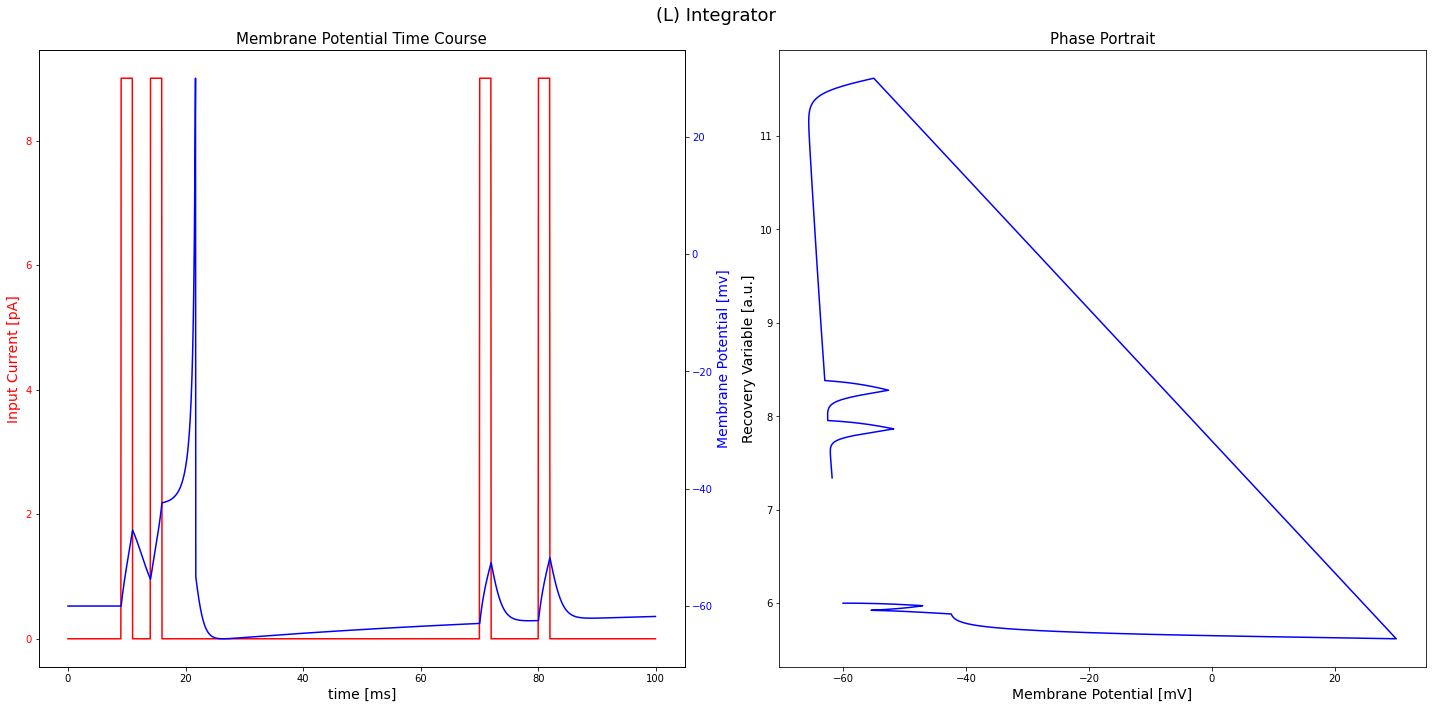

In [15]:
feature = '(L) Integrator'
dt = 0.05 #timestep [ms]
tmax = 100 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = int(tmax/11)
t2 = t1+5
t3 = 0.7*tmax
t4 = t3+10
I = np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +2) | (t[j] > t2 and t[j] < t2 +2) | (t[j] > t3 and t[j] < t3 +2) | (t[j] > t4 and t[j] < t4 +2)  :
        I[j] = 9
        
#initial conditions
a = 0.02
b = -0.1
c = -55
d = 6
u0 = -60
w0 = b*u0


neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (M) Rebound Spike

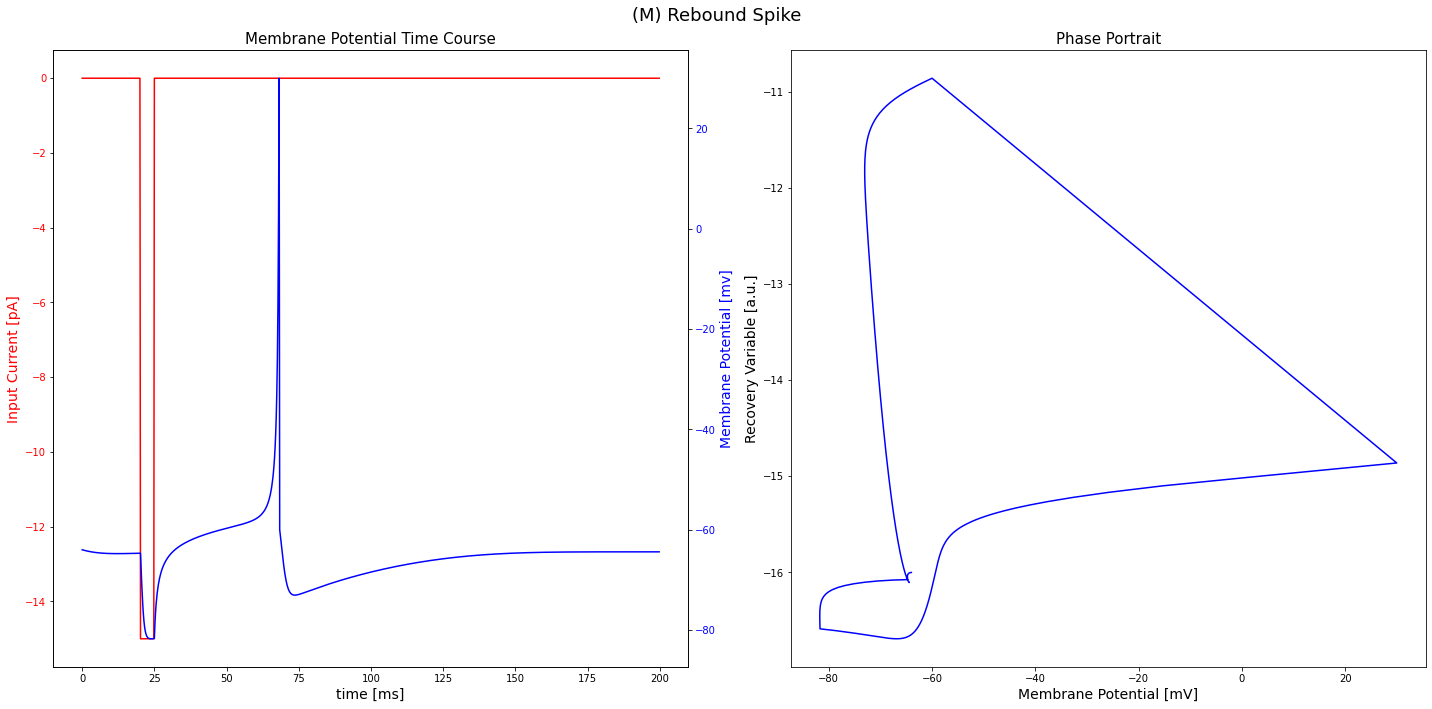

In [16]:
feature = '(M) Rebound Spike'
dt = 0.2 #timestep [ms]
tmax = 200 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 20
I = np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a = 0.03
b = 0.25
c = -60
d = 4
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (N) Rebound Burst

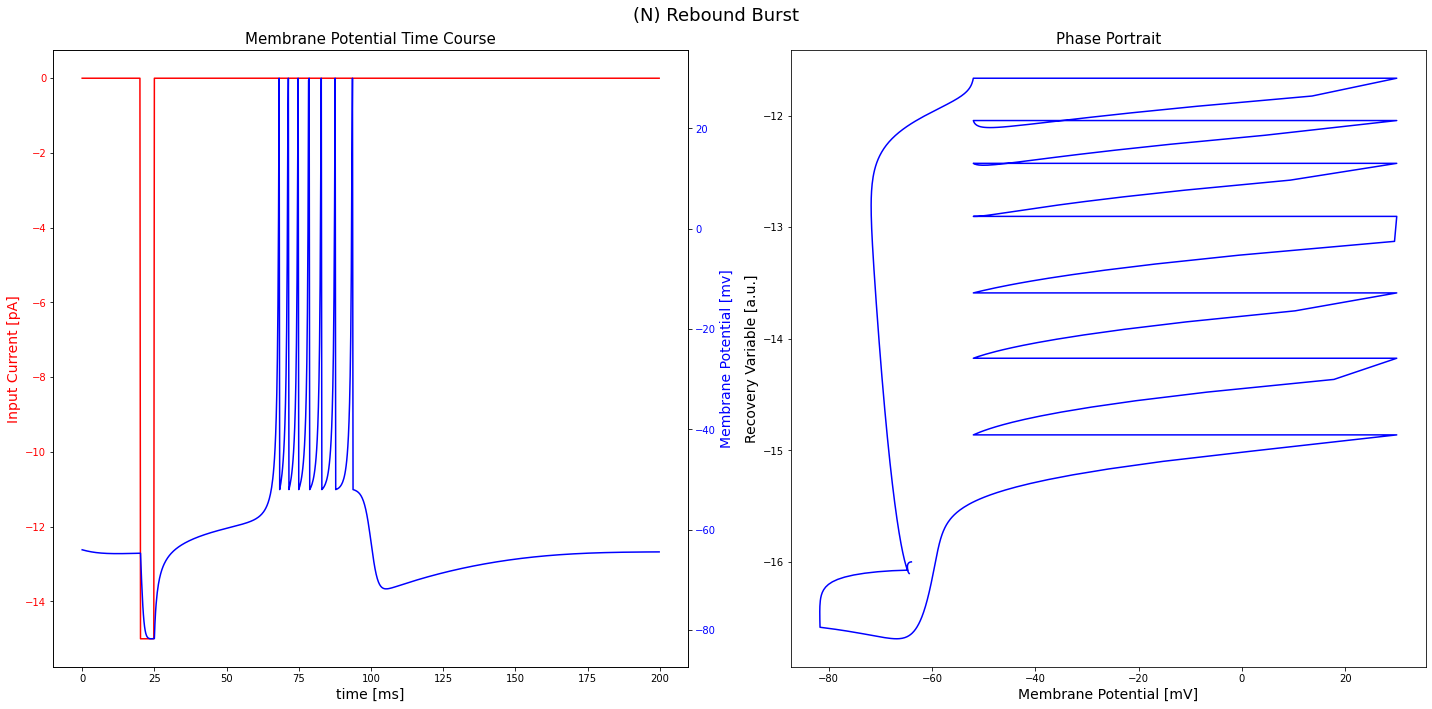

In [17]:
feature = '(N) Rebound Burst'
dt = 0.2 #timestep [ms]
tmax = 200 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 20
I = np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a = 0.03
b = 0.25
c = -52
d = 0
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (O) Threshold Variability

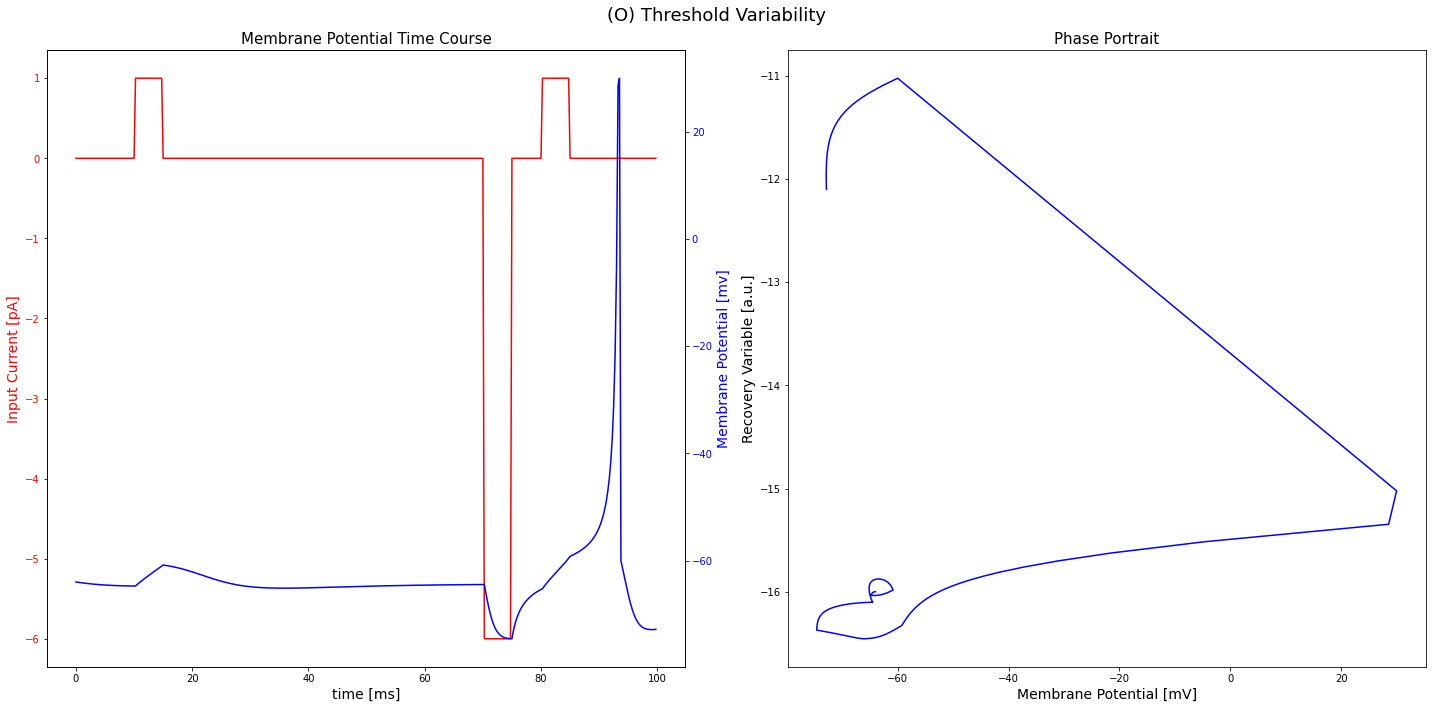

In [18]:
feature = '(O) Threshold Variability'
dt = 0.25 #timestep [ms]
tmax = 100 #ms
t = np.arange(0,tmax,dt)

#input current
I = np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] > 10 and t[j] < 15) | (t[j] > 80 and t[j] < 85) :
        I[j] = 1
    elif (t[j] > 70 and t[j] < 75):
        I[j] = -6
        
#initial conditions
a = 0.03
b = 0.25
c = -60
d = 4
u0 = -64
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (P) Bistability

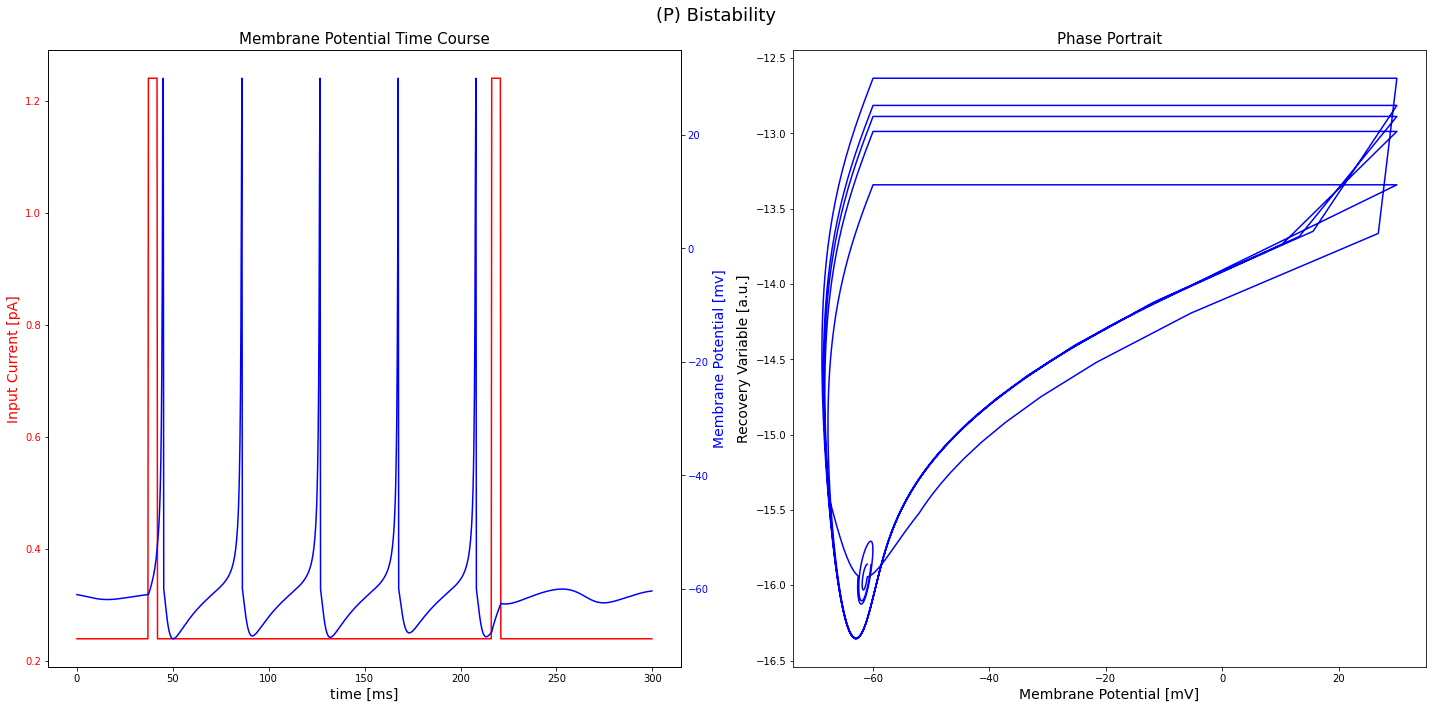

In [19]:
feature = '(P) Bistability'
dt = 0.25 #timestep [ms]
tmax = 300 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = int(tmax/8)
t2 = 216

I = np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.24
    else:
        I[j]=0.24
        
#initial conditions
a = 0.1
b = 0.26
c = -60
d = 0
u0 = -61
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (Q) Depolarising After-Potential

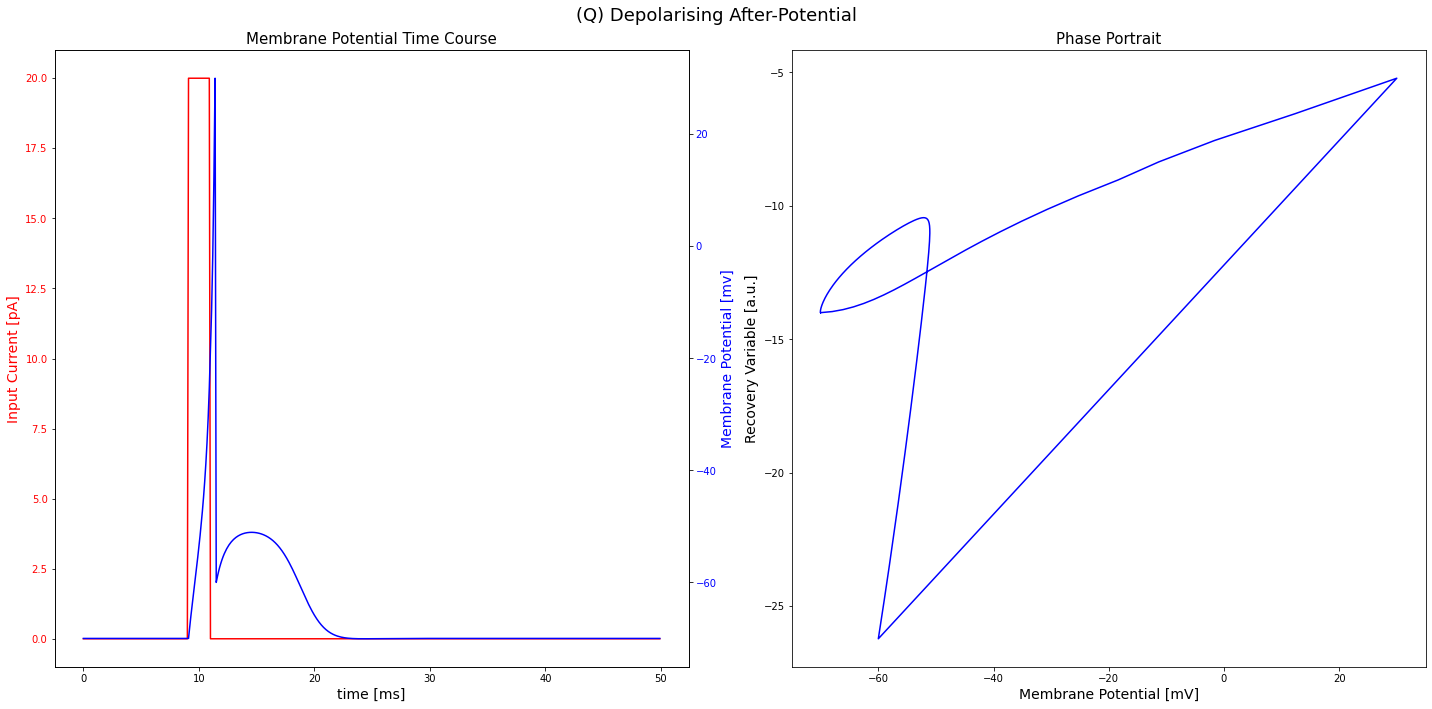

In [20]:
feature = '(Q) Depolarising After-Potential'
dt = 0.1 #timestep [ms]
tmax = 50 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 10

I = np.zeros(len(t))

for j in range(0,len(I)):
    if abs(t[j]-t1) < 1:
        I[j] = 20
        
#initial conditions
a = 1
b = 0.2
c = -60
d = -21
u0 = -70
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (R) Accomodation

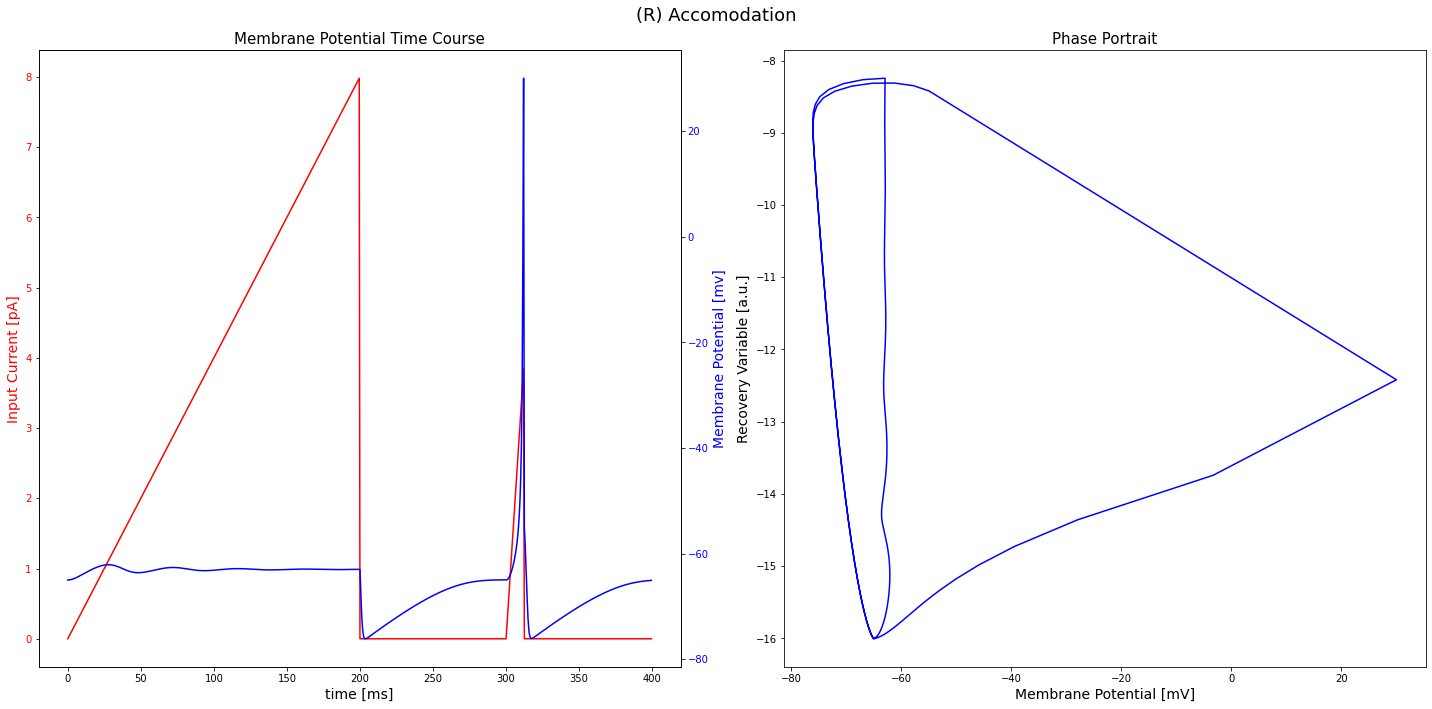

In [21]:
feature = '(R) Accomodation'
dt = 0.5 #timestep [ms]
tmax = 400 #ms
t = np.arange(0,tmax,dt)

#input current
t1 = 30
I = np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] < 200:
        I[j] = t[j]/25
    elif t[j] < 300:
        I[j] = 0
    elif t[j] < 312.5:
        I[j] = (t[j]-300)/12.5*4



#initial conditions
a = 0.02
b = 1
c = -55
d = 4
u0 = -65
w0 = -16

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (S) Inhibition-Induced Spiking

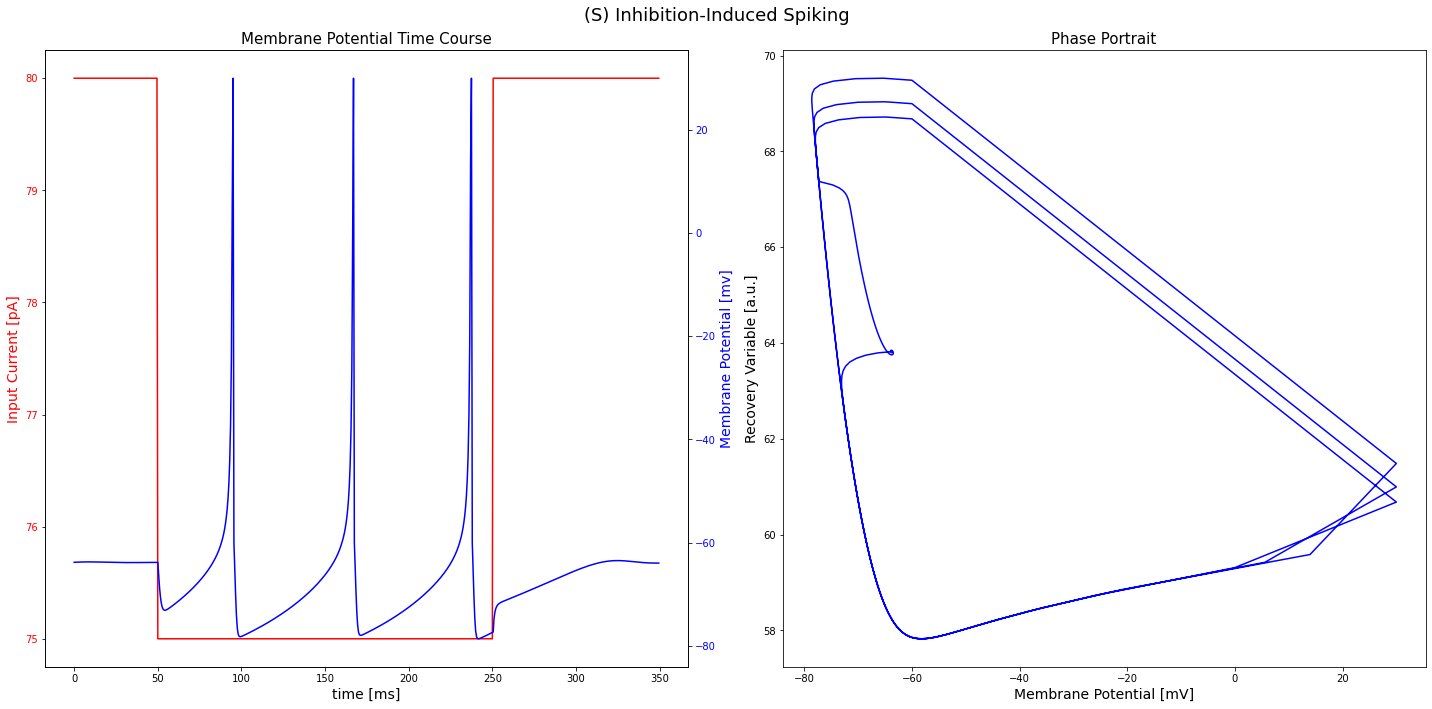

In [22]:
feature = '(S) Inhibition-Induced Spiking'
dt = 0.5 #timestep [ms]
tmax = 350 #ms
t = np.arange(0,tmax,dt)

#input current

I = np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] < 50) | (t[j] > 250) :
        I[j] = 80
    else:
        I[j] = 75
        
#initial conditions
a = -0.02
b = -1
c = -60
d = 8
u0 = -63.8
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)

# (T) Inhibition-Induced Bursting

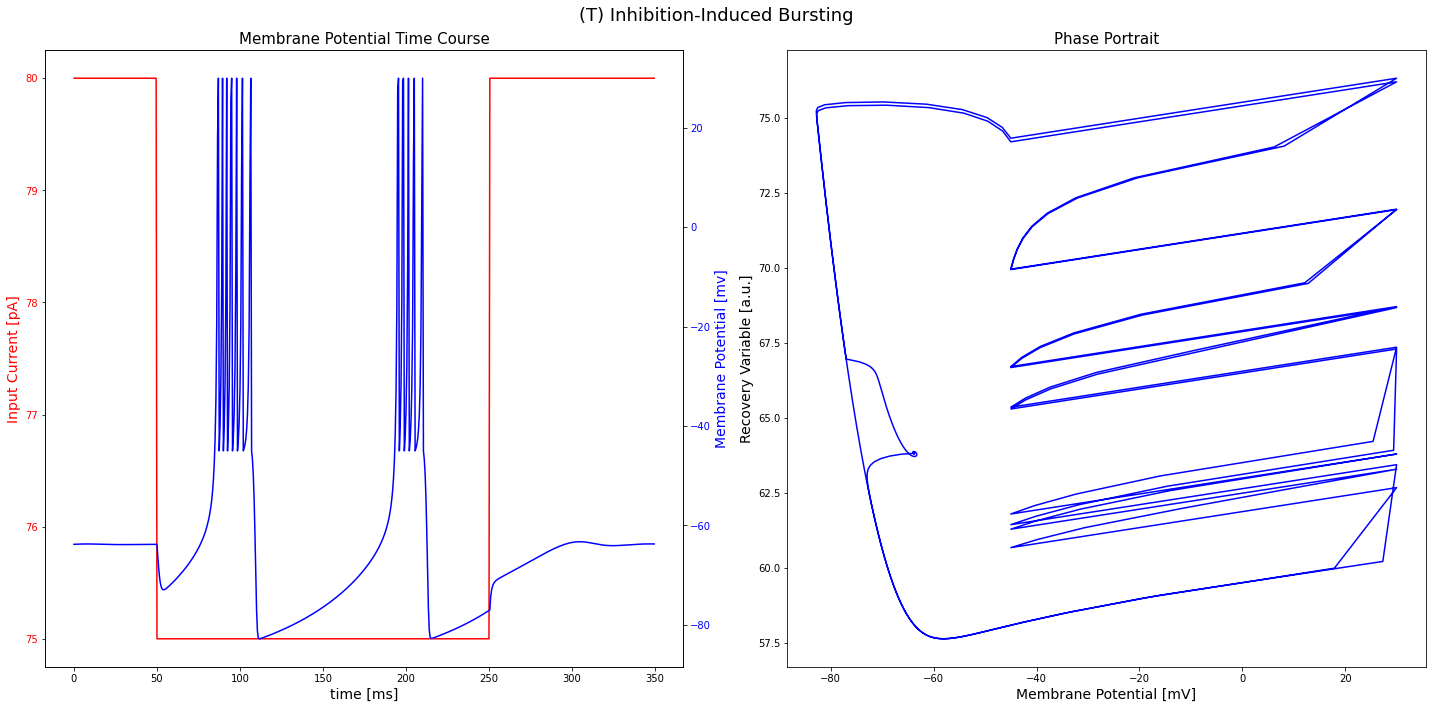

In [23]:
feature = '(T) Inhibition-Induced Bursting'
dt = 0.5 #timestep [ms]
tmax = 350 #ms
t = np.arange(0,tmax,dt)

#input current

I = np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] < 50) | (t[j] > 250) :
        I[j] = 80
    else:
        I[j] = 75
        
#initial conditions
a = -0.026
b = -1
c = -45
d = -2
u0 = -63.8
w0 = b*u0

neuronplot(feature,dt,t,I,a,b,c,d,u0,w0)